In [158]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

# standardize the training data
Xtr_mean = np.mean(Xtr,axis=0)
Xtr_std = np.std(Xtr,axis=0)
ytr_mean = np.mean(ytr)
ytr_std = np.std(ytr)

Xtr_standardized = ((Xtr-Xtr_mean[None,:])/Xtr_std[None,:]) # revise this line as needed
Xts_standardized = ((Xts-Xtr_mean[None,:])/Xtr_std[None,:]) # revise this line as needed
ytr_standardized = ((ytr-ytr_mean)/ytr_std)

# save the standardized training data
Xtr_savepath = 'Xtr_pytorch.csv'
Xts_savepath = 'Xts_pytorch.csv'
ytr_savepath = 'ytr_pytorch.csv'
yts_hat_savepath = 'yts_hat_pytorch.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

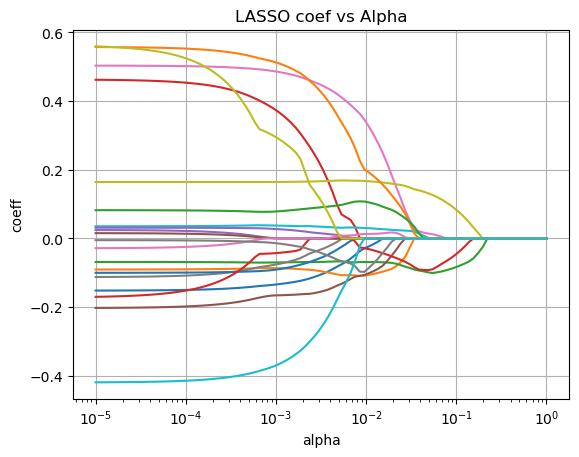

In [160]:
nalpha = 100
alphas = np.logspace(-5,0,nalpha)
alphas1, coeffs, _ = linear_model.lasso_path(Xtr_standardized, ytr_standardized, alphas=alphas)

# Plot the paths of the coefficients
plt.semilogx(alphas1,coeffs[0:20].T)
plt.grid()
#xmin, xmax, ymin, ymax = plt.axis()
#plt.axis([xmin,np.exp(np.log(xmax)+0.25*(np.log(xmax)-np.log(xmin))),ymin,ymax])
#plt.legend(loc='upper right')
plt.title('LASSO coef vs Alpha')
plt.xlabel('alpha')
plt.ylabel('coeff')
plt.show()

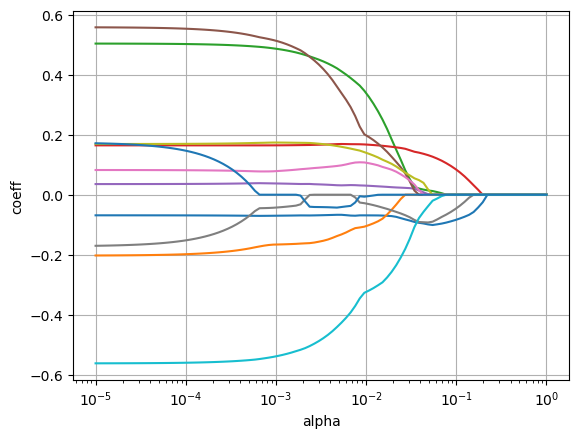

In [161]:
plt.semilogx(alphas1,coeffs[2].T)
plt.semilogx(alphas1,coeffs[5].T)
plt.semilogx(alphas1,coeffs[6].T)
plt.semilogx(alphas1,coeffs[8].T)
plt.semilogx(alphas1,coeffs[9].T)
plt.semilogx(alphas1,coeffs[11].T)
plt.semilogx(alphas1,coeffs[12].T)
plt.semilogx(alphas1,coeffs[13].T)
plt.semilogx(alphas1,coeffs[20].T)
plt.semilogx(alphas1,coeffs[21].T)
plt.semilogx(alphas1,coeffs[25].T)


# #plt.semilogx(alphas1,coeffs[-1+1].T)
# #plt.semilogx(alphas1,coeffs[0+1].T)
# plt.semilogx(alphas1,coeffs[1+1].T)
# #plt.semilogx(alphas1,coeffs[2+1].T)
# #plt.semilogx(alphas1,coeffs[3+1].T)
# plt.semilogx(alphas1,coeffs[4+1].T)
# plt.semilogx(alphas1,coeffs[5+1].T)
# #plt.semilogx(alphas1,coeffs[6+1].T)
# plt.semilogx(alphas1,coeffs[7+1].T)
# plt.semilogx(alphas1,coeffs[8+1].T)
# #plt.semilogx(alphas1,coeffs[9+1].T)
# plt.semilogx(alphas1,coeffs[10+1].T)
# plt.semilogx(alphas1,coeffs[11+1].T)
# plt.semilogx(alphas1,coeffs[12+1].T)
#plt.semilogx(alphas1,coeffs[13+1].T)
#plt.semilogx(alphas1,coeffs[14+1].T)
#plt.semilogx(alphas1,coeffs[15+1].T)
#plt.semilogx(alphas1,coeffs[16+1].T)
#plt.semilogx(alphas1,coeffs[17+1].T)
#plt.semilogx(alphas1,coeffs[18+1].T)
#plt.semilogx(alphas1,coeffs[19+1].T)
#plt.semilogx(alphas1,coeffs[20+1].T)
#plt.semilogx(alphas1,coeffs[21+1].T)
#plt.semilogx(alphas1,coeffs[22+1].T)
#plt.semilogx(alphas1,coeffs[23+1].T)
#plt.semilogx(alphas1,coeffs[24+1].T)



plt.grid()

plt.xlabel('alpha')
plt.ylabel('coeff')
plt.show()

In [162]:
lasso = Lasso(alpha = 1e-2, max_iter=100, tol=0.01, warm_start=True)
lasso.fit(Xtr_standardized, ytr_standardized)

# TODO
#rsq_cv = 

scores = cross_val_score(lasso, Xtr_standardized, ytr_standardized, cv=kf, scoring='r2')
rsq_cv = np.mean(scores)
print("cross-validation R^2 = %f" % rsq_cv)

cross-validation R^2 = 0.148031


[1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01]
alpha = 1e-05, num_features = 1
alpha = 2.06913808111479e-05, num_features = 1
alpha = 4.281332398719396e-05, num_features = 1
alpha = 8.858667904100833e-05, num_features = 1
alpha = 0.00018329807108324357, num_features = 1
alpha = 0.000379269019073225, num_features = 1
alpha = 0.0007847599703514606, num_features = 1
alpha = 0.001623776739188721, num_features = 1


C:\Users\BassD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+03, tolerance: 1.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\BassD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.772e+03, tolerance: 1.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\BassD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+03, toleranc

alpha = 0.003359818286283781, num_features = 1
alpha = 0.0069519279617756054, num_features = 1
alpha = 0.01438449888287663, num_features = 1
alpha = 0.029763514416313162, num_features = 1
alpha = 0.06158482110660261, num_features = 1
alpha = 0.1274274985703132, num_features = 1
alpha = 0.26366508987303555, num_features = 0
alpha = 0.5455594781168515, num_features = 0
alpha = 1.1288378916846884, num_features = 0
alpha = 2.3357214690901213, num_features = 0
alpha = 4.832930238571752, num_features = 0
alpha = 10.0, num_features = 0
cross-validation R^2 = nan


C:\Users\BassD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BassD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BassD\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\BassD\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\BassD\anaconda3\lib\site

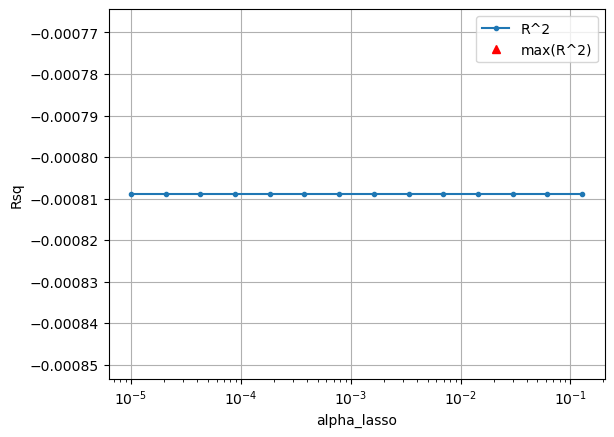

In [163]:
linreg = LinearRegression()
lasso = Lasso()
alphas_lasso = np.logspace(-5,1,20) # if Ytr is standardized
print(alphas_lasso)
kf = KFold(n_splits=5,shuffle=True,random_state=0)

rsq_cv = np.zeros(len(alphas_lasso))
for i,a in enumerate(alphas_lasso):
    # fit LASSO
    lasso.set_params(alpha = a, max_iter=100, tol=0.01, warm_start=True)
    lasso.fit(Xtr_standardized,ytr_standardized)
    # feature selection
    nonzero = np.any(np.abs(lasso.coef_)>0,axis=0)
    subset = np.where(nonzero)[0] # array of feature indices
    print("alpha = "+str(a)+", num_features = "+str(len(subset)))
    # fit LS and compute CV-R^2
    scores = cross_val_score(linreg, Xtr_standardized[:, subset], ytr_standardized, cv=kf, scoring='r2')
    rsq_cv[i] = np.mean(scores)

imax = np.argmax(rsq_cv)
alpha_lasso_max = alphas_lasso[imax]
rsq_cv_lasso_max = rsq_cv[imax]    
    
print("cross-validation R^2 = %f" % rsq_cv_lasso_max)
    
plt.semilogx(alphas_lasso, rsq_cv, '.-')
plt.semilogx(alpha_lasso_max, rsq_cv_lasso_max, 'r^')
plt.legend(['R^2', 'max(R^2)'],loc='best')
plt.xlabel('alpha_lasso')
plt.ylabel('Rsq')
plt.grid()
plt.show()